In [1]:
# ==============================================================
# Imports and Black-Scholes function
# ==============================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------
# Black-Scholes function
# ------------------------
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    """
    Calculate European Call or Put option price using Black-Scholes formula.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")


In [2]:
# ==============================================================
# Binomial Tree Pricing for European Options
# ==============================================================
def binomial_tree_price(S, K, T, r, sigma, N=100, option_type='call'):
    """
    Calculate European Call or Put option price using Cox-Ross-Rubinstein Binomial Tree.
    """
    dt = T / N                  # Time step
    u = np.exp(sigma * np.sqrt(dt))   # Up factor
    d = 1 / u                          # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Asset prices at maturity
    ST = np.array([S * u**j * d**(N-j) for j in range(N+1)])

    # Option values at maturity
    if option_type == 'call':
        option_values = np.maximum(ST - K, 0)
    elif option_type == 'put':
        option_values = np.maximum(K - ST, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Backward induction
    for i in range(N-1, -1, -1):
        option_values = np.exp(-r*dt) * (p * option_values[1:i+2] + (1-p) * option_values[0:i+1])

    return option_values[0]


Black-Scholes Call: 10.4506, Put: 5.5735
Binomial Tree Call: 10.4107, Put: 5.5336


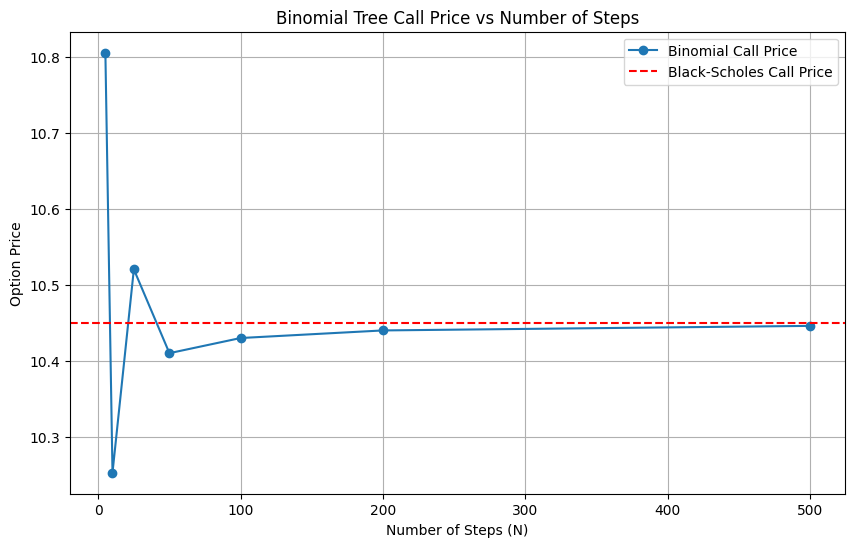

In [3]:
# ==============================================================
# Parameters
# ==============================================================
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
N = 50  # Number of steps for Binomial Tree

# ------------------------
# Calculate prices
# ------------------------
call_price_bs = black_scholes_price(S0, K, T, r, sigma, 'call')
put_price_bs = black_scholes_price(S0, K, T, r, sigma, 'put')

call_price_bin = binomial_tree_price(S0, K, T, r, sigma, N, 'call')
put_price_bin = binomial_tree_price(S0, K, T, r, sigma, N, 'put')

print(f"Black-Scholes Call: {call_price_bs:.4f}, Put: {put_price_bs:.4f}")
print(f"Binomial Tree Call: {call_price_bin:.4f}, Put: {put_price_bin:.4f}")

# ------------------------
# Compare Binomial Tree vs Black-Scholes
# ------------------------
N_values = [5, 10, 25, 50, 100, 200, 500]
call_prices_binomial = [binomial_tree_price(S0, K, T, r, sigma, N, 'call') for N in N_values]

plt.figure(figsize=(10,6))
plt.plot(N_values, call_prices_binomial, marker='o', label='Binomial Call Price')
plt.axhline(call_price_bs, color='red', linestyle='--', label='Black-Scholes Call Price')
plt.title('Binomial Tree Call Price vs Number of Steps')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


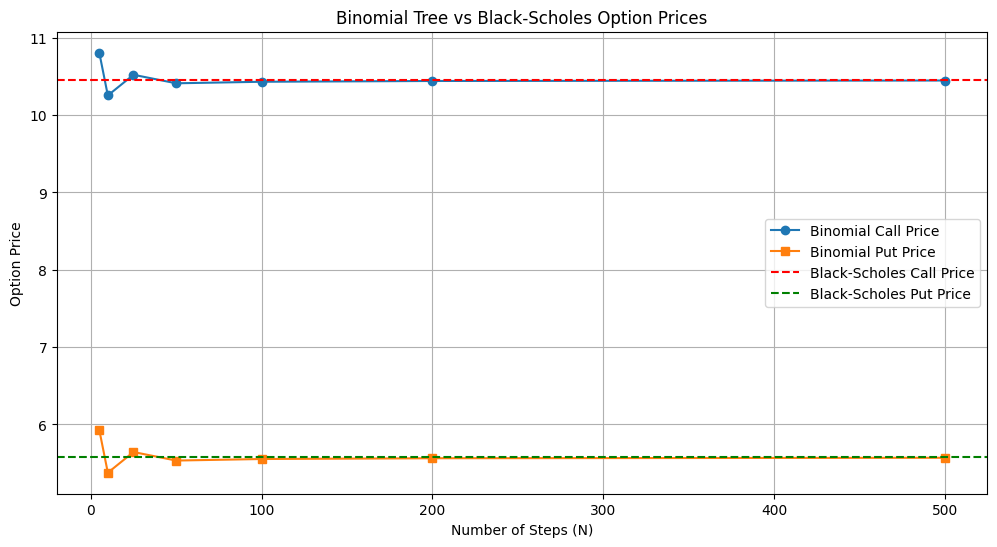

In [4]:
# ==============================================================
# Convergence of Binomial Tree to Black-Scholes for Call and Put
# ==============================================================
N_values = [5, 10, 25, 50, 100, 200, 500]

call_prices_binomial = [binomial_tree_price(S0, K, T, r, sigma, N, 'call') for N in N_values]
put_prices_binomial = [binomial_tree_price(S0, K, T, r, sigma, N, 'put') for N in N_values]

plt.figure(figsize=(12,6))
plt.plot(N_values, call_prices_binomial, marker='o', label='Binomial Call Price')
plt.plot(N_values, put_prices_binomial, marker='s', label='Binomial Put Price')
plt.axhline(call_price_bs, color='red', linestyle='--', label='Black-Scholes Call Price')
plt.axhline(put_price_bs, color='green', linestyle='--', label='Black-Scholes Put Price')
plt.title('Binomial Tree vs Black-Scholes Option Prices')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


# Binomial Tree Option Pricing

## What is the Binomial Tree Model

The **Binomial Tree (Cox-Ross-Rubinstein)** model is a discrete-time method to price options.  
It works by dividing the time to maturity into **N steps**, then simulating possible **up and down movements** of the underlying asset price.  
At each final node, we calculate the option payoff and then **work backwards** using risk-neutral probabilities to determine the present value.

---

## How it works

1. **Set parameters:**
   - `dt` = T / N → time step  
   - `u` = up factor = exp(σ√dt)  
   - `d` = down factor = 1 / u  
   - `p` = risk-neutral probability = (exp(r*dt) - d) / (u - d)  

2. **Generate asset prices at maturity:**  
   All possible prices after N steps are calculated as:  
   `ST = S * u^j * d^(N-j)` for j = 0..N  

3. **Calculate option payoff at maturity:**  
   - Call: max(ST - K, 0)  
   - Put: max(K - ST, 0)  

4. **Backward induction:**  
   We recursively compute the present value of the option at each prior node:  
   `option_value = exp(-r*dt) * (p * up_value + (1-p) * down_value)`

---

## Visualizing convergence

- **X-axis:** Number of steps N  
- **Y-axis:** Option price  
- **Blue line:** Binomial Call Price  
- **Orange line:** Binomial Put Price  
- **Red dashed line:** Black-Scholes Call Price (continuous model reference)  
- **Green dashed line:** Black-Scholes Put Price  

**Interpretation:**  
- As N increases, the Binomial Tree price **converges to the Black-Scholes price**.  
- Low N → rough approximation  
- High N → accurate approximation, approaching the continuous-time Black-Scholes model  

This plot allows you to **see how discretization affects option pricing** and how many steps are needed for an accurate result.
